<a href="https://colab.research.google.com/github/abalckpie/professorahn/blob/main/%EB%B0%98%EB%B3%B5%EC%B8%A1%EC%A0%95_%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import mixedlm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [12]:
csv_test = pd.read_csv('/content/2022_2022년 지능정보사회 이용자 패널 조사_Data(가중치포함).csv')
data = csv_test.copy()
columns_of_interest = ['Age_group'] + [f'Q30_{i}' for i in range(1, 25)]
subset_data = data[columns_of_interest]

In [13]:
subset_data['생활활용'] = subset_data[[f'Q30_{i}' for i in range(1, 7)]].mean(axis=1)
subset_data['권리보호'] = subset_data[[f'Q30_{i}' for i in range(7, 12)]].mean(axis=1)
subset_data['비판적 이해'] = subset_data[[f'Q30_{i}' for i in range(12, 16)]].mean(axis=1)
subset_data['생산과 공유'] = subset_data[[f'Q30_{i}' for i in range(16, 19)]].mean(axis=1)
subset_data['사회 참여'] = subset_data[[f'Q30_{i}' for i in range(19, 22)]].mean(axis=1)
subset_data['보안'] = subset_data[[f'Q30_{i}' for i in range(22, 25)]].mean(axis=1)

<ipython-input-13-50d5c1a80b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['생활활용'] = subset_data[[f'Q30_{i}' for i in range(1, 7)]].mean(axis=1)
<ipython-input-13-50d5c1a80b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['권리보호'] = subset_data[[f'Q30_{i}' for i in range(7, 12)]].mean(axis=1)
<ipython-input-13-50d5c1a80b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [14]:
long_data = pd.melt(subset_data, id_vars=['Age_group'], value_vars=['생활활용', '권리보호', '비판적 이해', '생산과 공유', '사회 참여', '보안'],
                    var_name='Factor', value_name='Response')

In [15]:
long_data['Age_group'] = long_data['Age_group'].astype('category')
agg_data = long_data.groupby(['Age_group', 'Factor']).mean().reset_index()

In [22]:
model = ols('Response ~ C(Factor) * C(Age_group)', data=long_data).fit()
anova_results = anova_lm(model, typ=2)
print(anova_results)

                              sum_sq       df            F        PR(>F)
C(Factor)                1379.694624      5.0   467.191227  0.000000e+00
C(Age_group)             3814.630088      5.0  1291.707369  0.000000e+00
C(Factor):C(Age_group)    144.114233     25.0     9.759972  1.200961e-37
Residual                19037.308287  32232.0          NaN           NaN


1. Factor : P < 0.001로 매우 유의미하다.
2. Age_group : P < 0.001로 매우 유의미하다.
3. Factor : Age_group : 둘 사이의 상호작용 효과도 매우 유의미하다. P<0.001

In [28]:
long_data['Group'] = long_data['Factor'].astype(str) + "_" + long_data['Age_group'].astype(str)


In [30]:
tukey = pairwise_tukeyhsd(endog=long_data['Response'], groups=long_data['Group'], alpha=0.05)
print(tukey)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  권리보호_1   권리보호_2   0.2146 0.0049  0.0288  0.4003   True
  권리보호_1   권리보호_3   0.1681 0.1817 -0.0205  0.3567  False
  권리보호_1   권리보호_4   0.0046    1.0 -0.1829  0.1922  False
  권리보호_1   권리보호_5  -0.2387 0.0005 -0.4252 -0.0522   True
  권리보호_1   권리보호_6  -0.6378    0.0  -0.831 -0.4446   True
  권리보호_1     보안_1   0.2835 0.0014  0.0521  0.5149   True
  권리보호_1     보안_2   0.4875    0.0  0.3017  0.6733   True
  권리보호_1     보안_3   0.2499 0.0002  0.0613  0.4385   True
  권리보호_1     보안_4   0.0476    1.0   -0.14  0.2351  False
  권리보호_1     보안_5  -0.2847    0.0 -0.4712 -0.0982   True
  권리보호_1     보안_6  -0.7546    0.0 -0.9478 -0.5614   True
  권리보호_1 비판적 이해_1   0.3409    0.0  0.1096  0.5723   True
  권리보호_1 비판적 이해_2   0.4863    0.0  0.3005  0.6721   True
  권리보호_1 비판적 이해_3   0.3419    0.0  0.1533  0.5305   True
  권리보호_1 비판적 이해_4   0.2221  0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

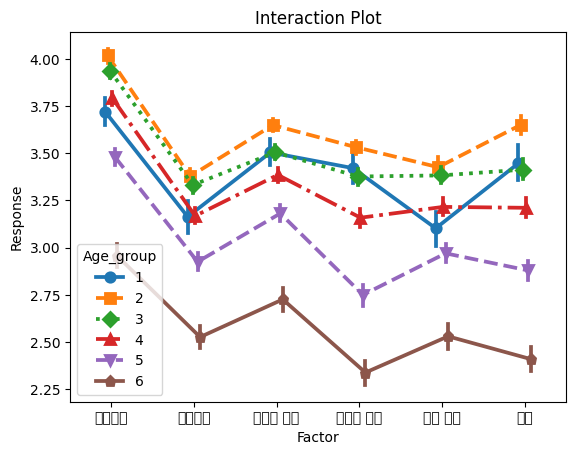

In [40]:
num_hue_levels = len(long_data['Age_group'].unique())
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '+', 'x'][:num_hue_levels]
linestyles = ['-', '--', ':', '-.', '--', '-', '--', ':', '-.', '--'][:num_hue_levels]

sns.pointplot(x='Factor', y='Response', hue='Age_group', data=long_data,
              dodge=True, markers=markers, linestyles=linestyles)
plt.title('Interaction Plot')
plt.show()